Data Preprocessing

In [ ]:
!pip install seaborn

In [ ]:
!pip install dash

In [ ]:
!pip install pandas networkx matplotlib ipywidgets


In [ ]:
#Importing Packages
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx





Uploading the Dataset

In [ ]:
urls=['https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1975_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1979_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1983_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1987_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1992_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1996_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1999_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2003_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2007_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2011_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2015_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2019_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2023_Match_Stats.csv'
      ]
#csv_files=[pd.read_csv(url) for url in urls]
#csv_files
crick_df = pd.concat([pd.read_csv(url) for url in urls], ignore_index=True)

crick_df.head()

Examining the DataFrame

In [ ]:
crick_df.info()

In [ ]:
crick_df.columns

In [ ]:
print(crick_df.shape)

In [ ]:
crick_df.describe()

Data Cleaning

In [ ]:

# Removing duplicate rows from the DataFrame
crick_df = crick_df.drop_duplicates()

# Resetting the index after removing duplicates
crick_df.reset_index(drop=True, inplace=True)

# Checking the shape of the DataFrame after removing duplicates
print(f"DataFrame shape after removing duplicates: {crick_df.shape}")

Removing Unnecessary Columns

Since the columns named 'Unnamed: 0.1','Unnamed: 0' don't have any specific meaning, we removed those columns.
Since the columns named 'commentary_line','date' aren't relevent for the data analysis, we removed those columns.

In [ ]:
# Removing unnessary colummuns
crick_df = crick_df.drop(columns=['date','Unnamed: 0.1','Unnamed: 0','commentary_line'])


In [ ]:
# checking null values
print(crick_df.isnull().sum())

In [ ]:
print(crick_df.shape)

Checking for outliers

In [ ]:


# Identify numerical columns
numerical_cols = ['team_1_runs', 'team_2_runs', 'team_1_wickets', 'team_2_wickets']

# Plot boxplots to visualize potential outliers
for col in numerical_cols:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=crick_df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

Checking for the rows with extreme values

Since the highest and lowest values of this dataset has a specific meaning according to the real scenario, we are going to check for extremely unrealistic values instead of following the normal ways like below.
1. considering the IQR
2. using the Boxplot

In [ ]:
# Filter rows where team_1_runs > 400
high_scoring_matches_1 = crick_df[crick_df['team_1_runs'] > 400]

# Display the filtered rows
print(high_scoring_matches_1)

Since these values are not extreme according to the reality, we are not going to remove these.

In [ ]:
crick_df.info()

In [ ]:
# Filter rows where team_1_runs < 50
low_scoring_matches_1 = crick_df[crick_df['team_1_runs'] < 50]

# Display the filtered rows
print(low_scoring_matches_1)

In [ ]:
# Filter rows where team_2_runs > 400
high_scoring_matches_2 = crick_df[crick_df['team_2_runs'] > 400]

# Display the filtered rows
print(high_scoring_matches_2)

In [ ]:
# Filter rows where team_2_runs < 50
low_scoring_matches_2 = crick_df[crick_df['team_2_runs'] < 50]

# Display the filtered rows
print(low_scoring_matches_2)

Since these values are not extreme according to the reality, we are not going to remove these.

Normally the minimum wicket count is 0 and the maximum wicket count is 10. Therefore we are going to check for extremes using these values.


In [ ]:
# Filter rows where team_1_wickets > 10
high_wicket_matches_1 = crick_df[crick_df['team_1_wickets'] > 10]

# Display the filtered rows
print(high_wicket_matches_1)

In [ ]:
# Filter rows where team_1_wickets <1
low_wicket_matches_1 = crick_df[crick_df['team_1_wickets'] < 1]

# Display the filtered rows
print(low_wicket_matches_1)

In [ ]:
# Filter rows where team_2_wickets > 10
high_wicket_matches_2 = crick_df[crick_df['team_2_wickets'] > 10]

# Display the filtered rows
print(high_wicket_matches_2)

In [ ]:
# Filter rows where team_2_wickets <1
low_wicket_matches_2 = crick_df[crick_df['team_2_wickets'] < 1]
# Display the filtered rows
print(low_wicket_matches_2)

There are no extreme values for the wicket counts.

Missing Value Imputation

In [ ]:
# checking null values
print(crick_df.isnull().sum())

In the dataset, the most past year's data lacks entries for "Player of the Match," "Best Batter," and "Best Bowler." Since these columns are important, we cannot remove the rows or drop the columns entirely. Therefore, we will replace the null values with the placeholder "Not Mentioned."

In [ ]:
# Columns to replace null values
columns_to_replace = ['pom', 'best_batters', 'best_bowlers']

# Replace null values with "Not Mentioned"
crick_df[columns_to_replace] = crick_df[columns_to_replace].fillna("Not Mentioned")

# Verify the changes
print(crick_df[columns_to_replace].head())

Removing records with null values

In [ ]:
# checking null values
print(crick_df.isnull().sum())

In [ ]:
# Remove rows with any null values
crick_df = crick_df.dropna()

# checking null values
print(crick_df.isnull().sum())


Removing duplicates

In [ ]:
print(crick_df.duplicated().sum())

In [ ]:
print(crick_df[crick_df.duplicated()])

In [ ]:
crick_df = crick_df.drop_duplicates()

# Adding New Columns
### Match Status

In [ ]:
# Define a function to check the status of a match
def check_abandoned(row):
    # List of column indices to check for null or empty values
    columns_to_check = ['team_1_runs','team_1_wickets','team_2_runs','team_2_wickets']

    # Check if any of the specified columns are null or empty
    if any(pd.isnull(row[col]) or row[col] == '' for col in columns_to_check):
        return 'abandoned'

    # Check if the value in column 11 is 'No result'
    if row['result'] == 'No result':
        return 'abandoned'

    # If none of the above conditions are met, return 'played'
    return 'played'

# Apply the function to each row of the DataFrame and create a new column 'match_status'
crick_df['match_status'] = crick_df.apply(check_abandoned, axis=1)

### Winning Team

1. A string column indicating the winning team of the match.
2. If the match was abandoned, leave this column empty. Otherwise, derive the
winning team from the result column.

In [ ]:
# Function to derive the winning team from the match result
def get_winning_team(row):
    if row['match_status'] == 'abandoned':
        return ''
    return row['result'].split(' won')[0]

# Apply the function to each row of the DataFrame and create a new column 'winning_team'
crick_df['winning_team'] = crick_df.apply(get_winning_team, axis=1)

In [ ]:
crick_df['winning_team'].unique()

Now we have some unexpected values so we replace them with proper result.

In [ ]:
crick_df['winning_team']=crick_df['winning_team'].str.replace('Winner QF4 (NZ v WI) v Winner QF1 (SA) - New Zealand',' New Zealand')
crick_df['winning_team']=crick_df['winning_team'].str.replace('Match tied (England','England')
crick_df['winning_team']=crick_df['winning_team'].str.replace('D2 v B2 - West Indies','West Indies')
crick_df['winning_team']=crick_df['winning_team'].str.replace('P2 v P3 - Australia','Australia')
crick_df['winning_team']=crick_df['winning_team'].str.replace('A1 v C1 - Australia','Australia')
crick_df['winning_team']=crick_df['winning_team'].str.replace('P1 v P4 - India','India')

In [ ]:
print(crick_df.columns)

# Spliting Best bowler and best Batter columns

In [ ]:
# Remove specified symbols including inverted commas from the 'best_batters' and 'best_bowlwers' column
crick_df['best_batters'] = crick_df['best_batters'].str.replace(r"[\[\]']", '', regex=True)
crick_df['best_bowlers'] = crick_df['best_bowlers'].str.replace(r"[\[\]']", '', regex=True)

# Battings

# Split the 'best_batters' column into two new columns: 'best_batter_1_details' and 'best_batter_2_details'
crick_df[['best_batter_1_details', 'best_batter_2_details']] = crick_df['best_batters'].str.split(',', expand=True)
# Split the 'best_batter_1_details' column into two new columns: 'best_batter_1' and 'best_batter_1_runs'
crick_df[['best_batter_1', 'best_batter_1_runs']] = crick_df['best_batter_1_details'].str.split(' - ', expand=True)
# Split the 'best_batter_2_details' column into two new columns: 'best_batter_2' and 'best_batter_2_runs'
crick_df[['best_batter_2', 'best_batter_2_runs']] = crick_df['best_batter_2_details'].str.split(' - ', expand=True)
# Drop the now unnecessary 'best_batter_1_details' and 'best_batter_2_details' columns
crick_df.drop(['best_batter_1_details', 'best_batter_2_details'], axis=1, inplace=True)



# Bowling

# Split the 'best_bowlers' column into two new columns: 'best_bowler_1_details' and 'best_bowler_2_details'
crick_df[['best_bowler_1_details', 'best_bowler_2_details']] = crick_df['best_bowlers'].str.split(',', expand=True)
# Split the 'best_bowler_1_details' column into two new columns: 'best_bowler_1' and 'best_bowler_1_runs'
crick_df[['best_bowler_1', 'best_bowler_1_wic']] = crick_df['best_bowler_1_details'].str.split(' - ', expand=True)
# Split the 'best_bowler_2_details' column into two new columns: 'best_bowler_2' and 'best_bowler_2_runs'
crick_df[['best_bowler_2', 'best_bowler_2_wick']] = crick_df['best_bowler_2_details'].str.split(' - ', expand=True)
# Drop the now unnecessary 'best_bowler_1_details' and 'best_bowler_2_details' columns
crick_df.drop(['best_bowler_1_details', 'best_bowler_2_details'], axis=1, inplace=True)

In [ ]:
print(crick_df.columns)

Data Preparation 

Renaming the country names

In [ ]:
crick_df['team_1'].unique()

In [ ]:
crick_df['team_1']=crick_df['team_1'].str.replace('Australia','AUS')
crick_df['team_1']=crick_df['team_1'].str.replace('KENYA','KEN')

In [ ]:
crick_df['team_1'].unique()

In [ ]:
row_index = crick_df.index[crick_df['team_1'] == 'EAf'].tolist()
print(row_index)

In [ ]:
crick_df['team_2'].unique()

In [ ]:
crick_df['team_2']=crick_df['team_2'].str.replace('West Indies','WI')
crick_df['team_2']=crick_df['team_2'].str.replace('KENYA','KEN')

In [ ]:
crick_df['team_2'].unique()

Making a list of years

In [ ]:
years = crick_df['world_cup_year'].unique()  # Get unique values from team_1

# Now 'countries' contains the unique values from both columns without duplicates
print(years)

Making a list of countries

In [ ]:
# Assuming you have the crick_df DataFrame with team_1 and team_2 columns
team_1_unique = crick_df['team_1'].unique()  # Get unique values from team_1
team_2_unique = crick_df['team_2'].unique()  # Get unique values from team_2

# Merge the two lists and remove duplicates
countries = list(set(team_1_unique) | set(team_2_unique))  # Union of both lists

# Now 'countries' contains the unique values from both columns without duplicates
print(countries)


Bar Chart 1

Data preparation for the bar chart which shows the average runs scored by each country against other countries

In [ ]:
result_dict = {}
for teams_y_country in countries:
  index_list_1 = crick_df.loc[crick_df['team_1'] == teams_y_country].index.tolist()
  index_list_2 = crick_df.loc[crick_df['team_2'] == teams_y_country].index.tolist()
  # print(index_list_1)
  # print(index_list_2)
  team_x_Country = crick_df.loc[index_list_1, 'team_2'].tolist()+crick_df.loc[index_list_2, 'team_1'].tolist()
  # print(team_x_Country)
  team_x_runs = crick_df.loc[index_list_1, 'team_1_runs'].tolist()+crick_df.loc[index_list_2, 'team_2_runs'].tolist()
  # print(team_x_runs)


  # subjects =team_x_Country
  # scores = team_x_runs

  # Create a dictionary to store the count and sum of scores for each teams
  subject_data = {}
  for team, runs in zip(team_x_Country, team_x_runs):
      # Initialize an empty dictionary for the country if it doesn't exist
      subject_data.setdefault(team, {"count": 0, "sum": 0})

      # Update the count and sum for the country
      subject_data[team]["count"] += 1
      subject_data[team]["sum"] += runs


  # Calculate the mean for each country
  country_means = {team_x_Country: data["sum"] / data["count"] for team_x_Country, data in subject_data.items()}
  result_dict[teams_y_country]=country_means
  # print(teams_y_country,country_means)

Country_short_to_long = {
    'KEN': 'Kenya',
    'NED': 'Netherlands',
    'CAN': 'Canada',
    'IRE': 'Ireland',
    'UAE': 'U.A.E.',
    'SA': 'South Africa',
    'AFG': 'Afghanistan',
    'NAM': 'Namibia',
    'NZ': 'New Zealand',
    'EAf': 'East Africa',
    'PAK': 'Pakistan',
    'WI': 'West Indies',
    'BER': 'Bermuda',
    'SCOT': 'Scotland',
    'ENG': 'England',
    'AUS': 'Australia',
    'SL': 'Sri Lanka',
    'ZIM': 'Zimbabwe',
    'IND': 'India',
    'BAN': 'Bangladesh',
    'Tied': 'Match tied'
}

# Renaming the first-level keys
result_dict = {Country_short_to_long.get(k, k): v for k, v in result_dict.items()}


# Display the bar chart result
print(result_dict)

In [ ]:
# Data
# data = result_dict

# Create traces for each dataset
fig = go.Figure()

for key, values in result_dict.items():
    fig.add_trace(
        go.Bar(
            x=list(values.keys()),
            y=list(values.values()),
            name=key,
            visible=False,  # Initially hide all traces
            hovertemplate=(
                "<b>%{customdata}</b> gets %{y:.1f} average scores against %{x}<extra></extra>"
            ),  # Custom tooltip
            customdata=[key] * len(values),  # Pass the team name to custom data
        )
    )

# Make the first dataset visible by default
fig.data[0].visible = True

# Create dropdown menu
buttons = []
for i, key in enumerate(result_dict.keys()):
    buttons.append(
        dict(
            label=key,
            method="update",
            args=[{"visible": [j == i for j in range(len(result_dict))]},  # Toggle visibility
                  {"title": f" The Average Runs Scored Aginst {key}"}] # Update the title
        )
    )

# Add dropdown to layout
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            direction="down",
            showactive=True,
            x=1,
            xanchor="right",
            y=1.2,
            yanchor="top"
        )
    ],
    title="The Average Runs Scores ",
    xaxis_title="Countries",
    yaxis_title="Average",
    template="plotly_dark"
)

# Show the figure
fig.show()

## Donut Chart 🍩

In [ ]:
# Step -1 We have to convert all the countryies in to same format



# Create a reverse mapping (long to short)
long_to_short = {v: k for k, v in Country_short_to_long.items()}

# Add a new column with short-form team names
crick_df['winning_team_short'] = crick_df['winning_team'].map(long_to_short)



# Function to determine the losing team
def get_losing_team(row):
    if row['winning_team'] == row['team_1']:
        return row['team_2']
    elif row['winning_team'] == row['team_2']:
        return row['team_1']
    else:
        return row['team_1']



# Add a new column 'losing_team'
crick_df['losing_team_short'] = crick_df.apply(get_losing_team, axis=1)


In [ ]:
# Initialize dictionaries for wins, losses, and ties
wins = {}
losses = {}
ties = {}

# Process each match
for _, row in crick_df.iterrows():
    team_1 = row["team_1"]
    team_2 = row["team_2"]
    winner = row["winning_team_short"]

    if winner == "Tied":
        # Increment ties for both teams
        ties[team_1] = ties.get(team_1, 0) + 1
        ties[team_2] = ties.get(team_2, 0) + 1
    else:
        # Increment wins for the winning team
        wins[winner] = wins.get(winner, 0) + 1
        # Increment losses for the losing team
        loser = team_2 if winner == team_1 else team_1
        losses[loser] = losses.get(loser, 0) + 1

# Combine results into a DataFrame
all_teams = set(wins.keys()).union(losses.keys()).union(ties.keys())
summary = pd.DataFrame({
    "Team": list(all_teams),
    "Wins": [wins.get(team, 0) for team in all_teams],
    "Losses": [losses.get(team, 0) for team in all_teams],
    "Ties": [ties.get(team, 0) for team in all_teams],
})

# Sort by team name
data_donut = summary.sort_values("Team").reset_index(drop=True)

# Remove Na values
data_donut = data_donut.dropna()

# Map short names to full names
data_donut['Team'] = data_donut['Team'].map(Country_short_to_long)

# Display updated DataFrame
print(data_donut)



In [ ]:
# Combine duplicate teams (if applicable)
data_donut = data_donut.groupby("Team", as_index=False).sum()

# Create a figure
fig = go.Figure()


# Add a donut chart trace for each team
for i, row in data_donut.iterrows():
    fig.add_trace(
        go.Pie(
            labels=["Wins", "Losses", "Ties"],
            values=[row["Wins"], row["Losses"], row["Ties"]],
            name=row["Team"],
            hole=0.4,  # This converts the pie chart into a donut chart
            visible=(i == 0),  # Only the first team is visible initially
            hovertemplate=(
                # "Team: <b>" + row["Team"] + "</b><br>"  # Displays the team name
                "No of %{label}="  # Displays the category (e.g., Wins)
                "%{value}<br>"  # Displays the value of the category
                "Percentage: %{percent}<extra></extra>"  # Displays the percentage
            ),
        )
    )

# Create dropdown menu
buttons = []
for i, row in data_donut.iterrows():
    visibility = [False] * len(data_donut)
    visibility[i] = True
    buttons.append(
        dict(
            label=row["Team"] if row["Team"] else "Unnamed Team",
            method="update",
            args=[
                {"visible": visibility},
                {"title": f"Performance of {row['Team']}"},
            ],
        )
    )

# Update layout with dropdown
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            direction="down",
            showactive=True,
            x=1,
            xanchor="right",
            y=1.2,
            yanchor="top",
        )
    ],
    title="Performance of Teams (Donut Chart)",
    template="plotly_dark"
)

# Show the figure
fig.show()

Line graph representing yearly wins of each country

In [ ]:
#LINE GRAPH

import plotly.graph_objects as go

# Initialize a dictionary to store the number of wins per country in each World Cup year
country_wins_per_year = {}

# Loop through all the matches to count wins per country in each World Cup year
for _, match in crick_df.iterrows():
    world_cup_year = match['world_cup_year']  # Get the World Cup year
    winning_team = match['winning_team']  # Get the winning team

    # Proceed only if both world cup year and winning team exist
    if world_cup_year and winning_team and winning_team != "Match tied":
        # Initialize the dictionary for the winning country if not already there
        if winning_team not in country_wins_per_year:
            country_wins_per_year[winning_team] = {}

        # Increment the win count for the winning team in the World Cup year
        if world_cup_year not in country_wins_per_year[winning_team]:
            country_wins_per_year[winning_team][world_cup_year] = 0

        country_wins_per_year[winning_team][world_cup_year] += 1

# Create a Plotly figure
fig = go.Figure()

# Loop over the dictionary to add traces for each country
for country, wins_in_years in country_wins_per_year.items():
    # Get the list of World Cup years and the corresponding win counts for the country
    years = sorted(wins_in_years.keys())  # Sort years in ascending order
    win_counts = [wins_in_years[year] for year in years]

    fig.add_trace(
        go.Scatter(
            x=years,  # World Cup years on the x-axis
            y=win_counts,  # Number of wins on the y-axis
            mode='lines+markers',  # Line chart with markers
            name=country,  # Name of the country as the legend label
            visible=False,  # Initially hide all traces
            hovertemplate="<b>%{text}</b> won %{y} matches in %{x}<extra></extra>",  # Corrected hovertemplate syntax
            text=[country] * len(years)  # Repeated country name for text
        )
    )

# Make the first dataset visible by default
fig.data[0].visible = True

# Create a dropdown menu to toggle between countries
buttons = []
for i, country in enumerate(country_wins_per_year.keys()):
    button = dict(
        label=country,
        method="update",
        args=[  # Update visible traces and the title
            {"visible": [j == i for j in range(len(fig.data))]},  # Toggle visibility
            {"title": f"Wins by {country} in World Cup Years"}  # Update the title
        ]
    )
    buttons.append(button)

# Add dropdown to layout
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction="down",
        showactive=True,
        x=1,
        xanchor="right",
        y=1.2,
        yanchor="top"
    )],
    title="Wins by Each Country in World Cup Years",
    xaxis_title="World Cup Years",
    yaxis_title="Number of Wins",
    template="plotly_dark"
)

# Show the figure
fig.show()

Tree Graph representing Semi-finalists, finalists and winner of each year

Available World Cup years: [1975 1979 1983 1987 1992 1996 1999 2003 2007 2011 2015 2019 2023]


Enter the World Cup year you want to visualize:  1996


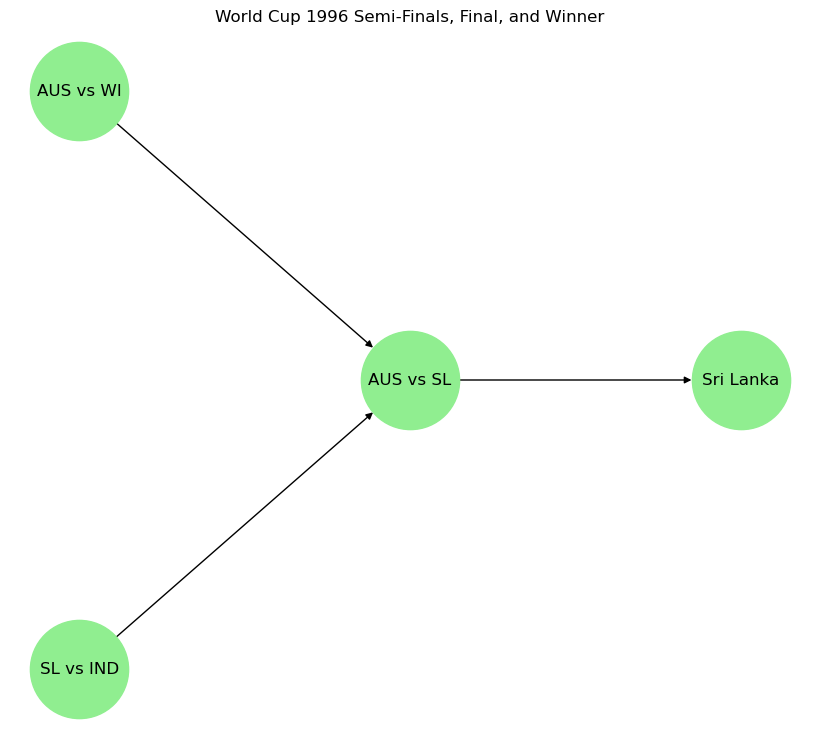

In [78]:



from matplotlib.patches import FancyBboxPatch

def create_cricket_tree_styled(data, world_cup_year):
    """
    Creates a styled hierarchical tree for the cricket world cup with three levels,
    using circular (rounded) edges for the rectangles and rotated 270 degrees (left-to-right flow).
    """
    # Filter data for the selected world cup year
    filtered_data = data[data['world_cup_year'] == world_cup_year]

    # Create a directed graph for the tree structure
    G = nx.DiGraph()

    # Add semi-final matches (team nodes and winners)
    semi_finals = filtered_data[filtered_data['match_category'] == 'Semi-Final']
    semi_winner_nodes = []
    team_positions = []  # To store positions of the first-level nodes

    for i, row in semi_finals.iterrows():
        team1_node = f"Semi-{i}-Team1-{row['team_1']}"
        team2_node = f"Semi-{i}-Team2-{row['team_2']}"
        winner_node = f"Semi-{i}-Winner-{row['winning_team']}"

        # Add nodes for teams and winner with updated labels
        G.add_node(team1_node, label=f"Semi-Finalist: {row['team_1']}")
        G.add_node(team2_node, label=f"Semi-Finalist: {row['team_2']}")
        G.add_node(winner_node, label=f"Finalist: {row['winning_team']}")

        # Store positions for first-level nodes
        team_positions.append((team1_node, team2_node))

        # Add edges from teams to the winner
        G.add_edge(team1_node, winner_node)
        G.add_edge(team2_node, winner_node)

        semi_winner_nodes.append(winner_node)

    # Add final winner node
    final_match = filtered_data[filtered_data['match_category'] == 'Final']
    if not final_match.empty:
        final_row = final_match.iloc[0]
        final_winner_node = f"Final-Winner-{final_row['winning_team']}"

        # Add node for the final winner
        G.add_node(final_winner_node, label=f"The Champions: {final_row['winning_team']}")

        # Add edges from semi-final winners to the final winner
        G.add_edge(semi_winner_nodes[0], final_winner_node)
        G.add_edge(semi_winner_nodes[1], final_winner_node)

    # Custom positions for the nodes
    pos = {}
    x_offset = 1.0  # Vertical spacing
    y_offset = 1.0  # Horizontal spacing
    y = 0.0

    # First level (Teams in semi-finals)
    for i, (team1, team2) in enumerate(team_positions):
        pos[team1] = (0, y)
        pos[team2] = (0, y - y_offset)
        y -= 2 * y_offset

    # Second level (Winners of semi-finals)
    for i, winner in enumerate(semi_winner_nodes):
        team1, team2 = team_positions[i]
        _, y1 = pos[team1]
        _, y2 = pos[team2]
        pos[winner] = (x_offset, (y1 + y2) / 2)

    # Third level (Final winner)
    if not final_match.empty:
        final_y = (pos[semi_winner_nodes[0]][1] + pos[semi_winner_nodes[1]][1]) / 2
        pos[final_winner_node] = (2 * x_offset, final_y)

    # Rotate positions: Swap x and y, and reverse the y-axis
    rotated_pos = {node: (y, -x) for node, (x, y) in pos.items()}

    # Draw the graph with custom styling
    plt.figure(figsize=(14, 10))
    ax = plt.gca()
    ax.set_facecolor("#001f3f")  # Dark blue background
    plt.title("Road to the ICC Men's World Cup Finals", fontsize=40, color="white", pad=20)

    # Draw edges (rectangular L-shape)
    for edge in G.edges():
        start, end = edge
        x1, y1 = rotated_pos[start]
        x2, y2 = rotated_pos[end]
        ax.plot([x1, x1, x2], [y1, y2, y2], color="black", linewidth=2, zorder=1)  # L-shaped edge

    # Draw nodes as rounded rectangles with colorful styling
    labels = nx.get_node_attributes(G, 'label')
    for node, (x, y) in rotated_pos.items():
        width, height = 0.6, 0.1  # Rectangle dimensions
        color = "#FFDC00" if "Final-Winner" in node else "#01FF70"  # Yellow for final winner, green for others
        rounded_rect = FancyBboxPatch((x - width / 2, y - height / 2), width, height, boxstyle="round,pad=0.05", color=color, ec="white", zorder=2)
        ax.add_patch(rounded_rect)

    #     # Draw nodes as rounded rectangles with colorful styling
    # labels = nx.get_node_attributes(G, 'label')
    # for node, (x, y) in rotated_pos.items():
    #     width, height = 0.6, 0.1  # Rectangle dimensions
    #     color = "#FFDC00" if "Final-Winner" in node else "#01FF70"  # Yellow for final winner, green for others
    #     rounded_rect = FancyBboxPatch((x - width / 2, y - height / 2), width, height, boxstyle="round,pad=0.05", color=color, ec="white", zorder=2)
    #     ax.add_patch(rounded_rect)
    #     ax.text(x, y, labels[node], horizontalalignment="center", verticalalignment="center",
    #             fontsize=12, color="black", zorder=3)

        # Split label into role and team
        label = labels[node]
        role, team = label.split(": ")

        # Draw two lines for text, with larger font for country name
        ax.text(x, y + 0.03, role, horizontalalignment="center", verticalalignment="center", fontsize=10, color="black", zorder=3)
        ax.text(x, y - 0.03, team, horizontalalignment="center", verticalalignment="center", fontsize=14, color="black", zorder=3)


    plt.title(f"Road to {world_cup_year} ICC Men's World Cup Finals")

    # Remove axes
    plt.axis("off")
    plt.show()

 # Draw the graph
    # pos = nx.multipartite_layout(G, subset_key="subset")
    # labels = nx.get_node_attributes(G, 'label')
    # plt.figure(figsize=(8, 7))
    # plt.title(f"Road to {world_cup_year} ICC Men's World Cup Finals")
    # nx.draw(G, pos, with_labels=True, labels=labels, node_size=5000, node_color="lightgreen", font_size=12)

    # plt.show()

# Load the dataset
cricket_data = crick_df

# Get unique World Cup years
unique_years = cricket_data['world_cup_year'].unique()
unique_years.sort()

# Print available years and ask user for input
print("Available World Cup years:", unique_years)
selected_year = int(input("Enter the World Cup year you want to visualize: "))

# Generate the tree diagram for the selected year
if selected_year in unique_years:
    create_cricket_tree_styled(cricket_data, selected_year)
else:
    print(f"Invalid year selected. Please choose from: {unique_years}")


Bar Chart represnting wins of a country in each host country

In [85]:
# Initialize a dictionary to store the number of wins per team in each host country
country_wins_in_host_dict = {}

crick_df = cricket_data

# Loop through all the matches
for _, match in crick_df.iterrows():
    host_country = match['host_country']  # Get the host country of the match
    winning_team = match['winning_team']  # Get the winning team

    # Proceed only if both host country and winning team exist and winning_team is not "Match tied"
    if host_country and winning_team and winning_team != "Match tied":
        # Initialize the dictionary for the country if not already there
        if winning_team not in country_wins_in_host_dict:
            country_wins_in_host_dict[winning_team] = {}

        # Increment the win count for the winning team in the host country
        if host_country not in country_wins_in_host_dict[winning_team]:
            country_wins_in_host_dict[winning_team][host_country] = 0

        country_wins_in_host_dict[winning_team][host_country] += 1

# Now `country_wins_in_host_dict` contains the number of wins per team in each host country, excluding "Match tied"
print(country_wins_in_host_dict)

{'Pakistan': {'England': 17, 'Pakistan': 9, 'Australia': 6, 'New Zealand': 4, 'South Africa': 2, 'West Indies': 1, 'Bangladesh': 1, 'Sri Lanka': 5, 'India': 4}, 'India': {'England': 18, 'India': 25, 'Australia': 6, 'New Zealand': 3, 'South Africa': 9, 'West Indies': 1, 'Bangladesh': 1}, 'Australia': {'England': 20, 'Pakistan': 1, 'India': 24, 'Australia': 11, 'South Africa': 11, 'West Indies': 11}, 'England': {'England': 23, 'India': 9, 'Pakistan': 4, 'Australia': 6, 'New Zealand': 2, 'South Africa': 3, 'West Indies': 5}, 'West Indies': {'England': 20, 'Pakistan': 3, 'India': 5, 'New Zealand': 4, 'Australia': 3, 'South Africa': 3, 'West Indies': 4, 'Bangladesh': 1}, 'New Zealand': {'England': 17, 'India': 12, 'New Zealand': 14, 'Pakistan': 1, 'South Africa': 5, 'West Indies': 7, 'Bangladesh': 1, 'Sri Lanka': 1}, 'Sri Lanka': {'England': 7, 'New Zealand': 4, 'Pakistan': 2, 'India': 6, 'Sri Lanka': 6, 'South Africa': 5, 'West Indies': 8, 'Australia': 2}, 'Zimbabwe': {'England': 4, 'New Z

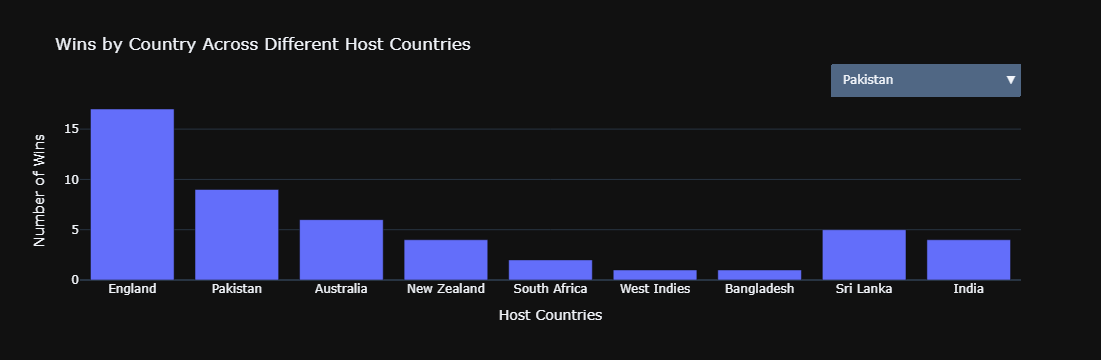

In [137]:
# Assuming `country_wins_in_host_dict` stores the wins for each country in each host country
# Format: {country: {host_country: win_count, ...}, ...}

# Create a figure
fig = go.Figure()

# Loop over the countries and add traces showing how that country wins in different host countries
for country, host_countries in country_wins_in_host_dict.items():
    # Extract the host countries and win counts
    host_country_names = list(host_countries.keys())
    win_counts = list(host_countries.values())

    # Add a bar trace for the selected country and its wins across host countries
    fig.add_trace(
        go.Bar(
            x=host_country_names,  # Host countries on the x-axis
            y=win_counts,  # Wins on the y-axis
            name=f"{country} wins across host countries",  # Legend label
            visible=False,  # Initially hide all traces
            hovertemplate="<b>%{x}</b> : %{y} wins<extra></extra>",  # Corrected custom tooltip
        )
    )

# Make the first dataset visible by default (for the first country in the dict)
fig.data[0].visible = True

# Create dropdown menu buttons for each country
buttons = []
for i, (country, host_countries) in enumerate(country_wins_in_host_dict.items()):
    button = dict(
        label=country,
        method="update",
        args=[
            {"visible": [j == i for j in range(len(fig.data))]},  # Toggle visibility for the selected country
            {"title": f"Wins by {country} in Different Host Countries"}  # Update the chart title
        ]
    )
    buttons.append(button)

# Add dropdown to layout
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction="down",
        showactive=True,
        x=1,
        xanchor="right",
        y=1.2,
        yanchor="top"
    )],
    title="Wins by Country Across Different Host Countries",
    xaxis_title="Host Countries",
    yaxis_title="Number of Wins",
    template="plotly_dark"
)

# Show the figure
fig.show()


Pie Chart representing the distribution of ICC World Cup Final Match victories of winning Countries

In [ ]:


# Load the dataset
data = crick_df

# Filter data for final matches only
# Assuming the column `match_category` identifies match types, and 'Final' is used for finals
finals_data = data[data['match_category'] == 'Final']

# Count the number of wins for each team
finals_wins = finals_data['winning_team'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(finals_wins, labels=finals_wins.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('ICC World Cup Final Match Wins (1975-2023)')
plt.show()


Dashboard

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
import matplotlib.pyplot as plt
import io
import base64
from matplotlib.patches import FancyBboxPatch



# Load and preprocess the dataset
# file_path = 'cleaned_crick_data.csv'  # Replace with your dataset path
# data = pd.read_csv(file_path)

data=pd.read_csv('https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/cleaned_crick_data.csv')
data=data.drop_duplicates()
crick_df=data
# Extract unique values for dropdowns
countries = sorted(list(set(data['team_1'].unique()) | set(data['team_2'].unique())))
years = sorted(data['world_cup_year'].unique())

# Define the Country_short_to_long dictionary for team short names to full names
Country_short_to_long = {
    'KEN': 'Kenya',
    'NED': 'Netherlands',
    'CAN': 'Canada',
    'IRE': 'Ireland',
    'UAE': 'U.A.E.',
    'SA': 'South Africa',
    'AFG': 'Afghanistan',
    'NAM': 'Namibia',
    'NZ': 'New Zealand',
    'EAf': 'East Africa',
    'PAK': 'Pakistan',
    'WI': 'West Indies',
    'BER': 'Bermuda',
    'SCOT': 'Scotland',
    'ENG': 'England',
    'AUS': 'Australia',
    'SL': 'Sri Lanka',
    'ZIM': 'Zimbabwe',
    'IND': 'India',
    'BAN': 'Bangladesh',
    'Tied': 'Match tied'
}

data['winning_team']=data['winning_team'].str.replace('Match tied (D/L method)','Match tied')


long_to_short = {v: k for k, v in Country_short_to_long.items()}

# Add a new column with short-form team names
data['winning_team_short'] = data['winning_team'].map(long_to_short)

# Function to determine the lo sing team
def get_losing_team(row):
    if row['winning_team'] == row['team_1']:
        return row['team_2']
    elif row['winning_team'] == row['team_2']:
        return row['team_1']
    else:
        return row['team_1']

# Add a new column 'losing_team_short'
data['losing_team_short'] = data.apply(get_losing_team, axis=1)

# Initialize dictionaries for wins, losses, and ties
wins = {}
losses = {}
ties = {}

# Process each match
for _, row in data.iterrows():
    team_1 = row["team_1"]
    team_2 = row["team_2"]
    winner = row["winning_team_short"]

    if winner == "Tied":
        # Increment ties for both teams
        ties[team_1] = ties.get(team_1, 0) + 1
        ties[team_2] = ties.get(team_2, 0) + 1
    else:
        # Increment wins for the winning team
        wins[winner] = wins.get(winner, 0) + 1
        # Increment losses for the losing team
        loser = team_2 if winner == team_1 else team_1
        losses[loser] = losses.get(loser, 0) + 1

# Combine results into a DataFrame
all_teams = set(wins.keys()).union(losses.keys()).union(ties.keys())
summary = pd.DataFrame({
    "Team": list(all_teams),
    "Wins": [wins.get(team, 0) for team in all_teams],
    "Losses": [losses.get(team, 0) for team in all_teams],
    "Ties": [ties.get(team, 0) for team in all_teams],
})

# Sort by team name and map short names to full names
data_donut = summary.sort_values("Team").reset_index(drop=True)
data_donut['Team'] = data_donut['Team'].map(Country_short_to_long)

# Combine duplicate teams (if applicable)
data_donut = data_donut.groupby("Team", as_index=False).sum()


# Filter data for final matches only
# Assuming the column `match_category` identifies match types, and 'Final' is used for finals
finals_data = data[data['match_category'] == 'Final']

# Count the number of wins for each team
finals_wins = finals_data['winning_team'].value_counts()

# calculating for the line chart

# Initialize a dictionary to store the number of wins per country in each World Cup year
country_wins_per_year = {}

# Loop through all the matches to count wins per country in each World Cup year
for _, match in crick_df.iterrows():
    world_cup_year = match['world_cup_year']  # Get the World Cup year
    winning_team = match['winning_team']  # Get the winning team

    # Proceed only if both world cup year and winning team exist
    if world_cup_year and winning_team and winning_team != "Match tied":
        # Initialize the dictionary for the winning country if not already there
        if winning_team not in country_wins_per_year:
            country_wins_per_year[winning_team] = {}

        # Increment the win count for the winning team in the World Cup year
        if world_cup_year not in country_wins_per_year[winning_team]:
            country_wins_per_year[winning_team][world_cup_year] = 0

        country_wins_per_year[winning_team][world_cup_year] += 1

# Calultiong for host country

# Initialize a dictionary to store the number of wins per team in each host country
country_wins_in_host_dict = {}

# Loop through all the matches
for _, match in crick_df.iterrows():
    host_country = match['host_country']  # Get the host country of the match
    winning_team = match['winning_team']  # Get the winning team

    # Proceed only if both host country and winning team exist and winning_team is not "Match tied"
    if host_country and winning_team and winning_team != "Match tied":
        # Initialize the dictionary for the country if not already there
        if winning_team not in country_wins_in_host_dict:
            country_wins_in_host_dict[winning_team] = {}

        # Increment the win count for the winning team in the host country
        if host_country not in country_wins_in_host_dict[winning_team]:
            country_wins_in_host_dict[winning_team][host_country] = 0

        country_wins_in_host_dict[winning_team][host_country] += 1


# Define custom colors for the pie chart
custom_colors = ["#FF6347  ", "#FFD700  ", "#D2A6CD "]


# Calcutions for tree graph
# Function to create and return a cricket tree diagram as an image
def create_cricket_tree_styled(data, world_cup_year):
    # Filter data for the selected World Cup year
    filtered_data = data[data['world_cup_year'] == world_cup_year]

    # Create a directed graph for the tree structure
    G = nx.DiGraph()

    # Add semi-final matches (team nodes and winners)
    semi_finals = filtered_data[filtered_data['match_category'] == 'Semi-Final']
    semi_winner_nodes = []
    team_positions = []  # To store positions of the first-level nodes

    for i, row in semi_finals.iterrows():
        team1_node = f"Semi-{i}-Team1-{row['team_1']}"
        team2_node = f"Semi-{i}-Team2-{row['team_2']}"
        winner_node = f"Semi-{i}-Winner-{row['winning_team']}"

        # Add nodes for teams and winner with updated labels
        G.add_node(team1_node, label=f"Semi-Finalist: {row['team_1']}")
        G.add_node(team2_node, label=f"Semi-Finalist: {row['team_2']}")
        G.add_node(winner_node, label=f"Finalist: {row['winning_team']}")

        # Store positions for first-level nodes
        team_positions.append((team1_node, team2_node))

        # Add edges from teams to the winner
        G.add_edge(team1_node, winner_node)
        G.add_edge(team2_node, winner_node)

        semi_winner_nodes.append(winner_node)

    # Add final winner node
    final_match = filtered_data[filtered_data['match_category'] == 'Final']
    if not final_match.empty:
        final_row = final_match.iloc[0]
        final_winner_node = f"Final-Winner-{final_row['winning_team']}"

        # Add node for the final winner
        G.add_node(final_winner_node, label=f"The Champions: {final_row['winning_team']}")

        # Add edges from semi-final winners to the final winner
        if len(semi_winner_nodes) >= 2:
            G.add_edge(semi_winner_nodes[0], final_winner_node)
            G.add_edge(semi_winner_nodes[1], final_winner_node)

    # Custom positions for the nodes
    pos = {}
    x_offset = 1.0  # Vertical spacing
    y_offset = 1.0  # Horizontal spacing
    y = 0.0

    # First level (Teams in semi-finals)
    for i, (team1, team2) in enumerate(team_positions):
        pos[team1] = (0, y)
        pos[team2] = (0, y - y_offset)
        y -= 2 * y_offset

    # Second level (Winners of semi-finals)
    for i, winner in enumerate(semi_winner_nodes):
        team1, team2 = team_positions[i]
        _, y1 = pos[team1]
        _, y2 = pos[team2]
        pos[winner] = (x_offset, (y1 + y2) / 2)

    # Third level (Final winner)
    if not final_match.empty:
        final_y = (pos[semi_winner_nodes[0]][1] + pos[semi_winner_nodes[1]][1]) / 2
        pos[final_winner_node] = (2 * x_offset, final_y)

    # Rotate positions: Swap x and y, and reverse the y-axis
    rotated_pos = {node: (y, -x) for node, (x, y) in pos.items()}

    # Draw the graph with custom styling
    fig =plt.figure(figsize=(14, 10))
    ax = plt.gca()
    ax.set_facecolor((8/255, 0, 124/255, 0.6))  # Dark blue background
    fig.set_facecolor((8/255, 0, 124/255, 0.6))
    plt.title(f"Road to {world_cup_year} ICC Men's World Cup Finals", fontsize=25,fontweight='bold', color="white", pad=20)

    # Draw edges (rectangular L-shape)
    for edge in G.edges():
        start, end = edge
        x1, y1 = rotated_pos[start]
        x2, y2 = rotated_pos[end]
        ax.plot([x1, x1, x2], [y1, y2, y2], color="white", linewidth=2, zorder=1)

    # Draw nodes as rounded rectangles with colorful styling
    labels = nx.get_node_attributes(G, 'label')
    for node, (x, y) in rotated_pos.items():
        width, height = 0.8, 0.3  # Rectangle dimensions
        color = "#FFDC00" if "Final-Winner" in node else "#89CFF0"  # Yellow for final winner, green for others
        rounded_rect = FancyBboxPatch((x - width / 2, y - height / 2), width, height, boxstyle="round,pad=0.05", color=color, ec="white", zorder=2)
        ax.add_patch(rounded_rect)

        # Split label into role and team
        label = labels[node]
        role, team = label.split(": ")

        # Draw two lines for text, with larger font for country name
        ax.text(x, y + 0.03, role, horizontalalignment="center", verticalalignment="center", fontsize=16,fontweight='bold', color="black", zorder=3)
        ax.text(x, y - 0.03, team, horizontalalignment="center", verticalalignment="center", fontsize=16, fontweight='bold',color="black", zorder=3)

    # Remove axes
    plt.axis("off")

    # Save the plot to a BytesIO buffer with a transparent background
    buffer = io.BytesIO()
    plt.savefig(buffer, format="png", transparent=False,bbox_inches="tight")
    buffer.seek(0)
    encoded_image = base64.b64encode(buffer.read()).decode('utf-8')
    plt.close()
    return f"data:image/png;base64,{encoded_image}"



# App initialization
app = dash.Dash(__name__)
app.title = "ICC World Cup Analysis Dashboard"

# Layout
# Layout
app.layout = html.Div(
    #style={"backgroundColor": "#FF0000"},
    style={
        "backgroundImage":'url("https://github.com/ashanjayamal/PyDataProject/blob/main/Cricket-Wallpaper-08-1920x1080-768x432.jpg?raw=true")',
        # "backgroundImage": "url("https://next-images.123rf.com/index/_next/image/?url=https://assets-cdn.123rf.com/index/static/assets/top-section-bg.jpeg&w=3840&q=75.jpeg")
            "backgroundSize": "cover",  # Ensure the image covers the entire container
        "backgroundPosition": "center",  # Center the image
        "backgroundRepeat": "no-repeat",  # Prevent the image from repeating
        "backgroundColor": "rgba(5, 5, 40, 0.7)",  # Semi-transparent background color with rgba (alpha=0.7)
    },
    children=[
        html.H1("ICC Cricket World Cup Dashboard", style={"textAlign": "center", "color": "white"}),
        #html.Img(src='./assets/ad7afa183393893.653f693f04b8f.jpg', className="header-image"),

        # Filter and Stats Display (Total Runs, Total Wickets, Highest Innings Total)
        html.Div(
            children=[
                # First Row: Country Dropdown, Year Dropdown, and Stat Blocks
                html.Div(
                    children=[
                        # Country Dropdown
                        html.Div(
                            children=[
                                html.Label("Select Country", style={"color": "black", "marginBottom": "5px", "fontWeight": "bold"}),
                                dcc.Dropdown(
                                    id="country-dropdown",
                                    options=[{"label": country, "value": country} for country in countries],
                                    value=countries[7],  # Default selection
                                    clearable=False,
                                    style={"margin-bottom": "10px", "width": "100%"},
                                ),
                            ],
                            style={"width": "15%", "textAlign": "center", "padding": "10px"},
                        ),
                        # Year Dropdown
                        html.Div(
                            children=[
                                html.Label("Select Year", style={"color": "black", "marginBottom": "5px", "fontWeight": "bold"}),
                                dcc.Dropdown(
                                    id="year-dropdown",
                                    options=[{"label": year, "value": year} for year in years],
                                    value=years[0],  # Default selection
                                    clearable=False,
                                    style={"margin-bottom": "10px", "width": "100%"},
                                ),
                            ],
                            style={"width": "10%", "textAlign": "center", "padding": "10px"},
                        ),
                        # Stat Block 1: Total Runs
                        html.Div(
                            children=[
                                html.H3("Total Runs Scored", id="total-runs", style={"color": "#ddda03","marginTop":"2px","marginBottom":"2px"}),
                                html.Div(id="total-runs-value", style={
                                    "fontSize": "22px", "fontWeight": "bold", "color": "#c5461a", "padding": "5px"
                                }),
                            ],
                            style={
                                "width": "15%", "textAlign": "center", "padding": "20px",
                                "boxShadow": "0px 4px 10px rgba(0,0,0,0.1)", "borderRadius": "12px",
                                "backgroundColor": "rgba(8, 0, 124, 0.8)", "border": "2px solid #00a1e8",
                                "height": "50px"
                            },
                        ),
                        # Stat Block 2: Total Wickets
                        html.Div(
                            children=[
                                html.H3("Total Wickets Taken", id="total-wickets", style={"color": "#ddda03","marginTop":"2px","marginBottom":"2px"}),
                                html.Div(id="total-wickets-value", style={
                                    "fontSize": "22px", "fontWeight": "bold", "color": "#03dd66", "padding": "10px"
                                }),
                            ],
                            style={
                                "width": "15%", "textAlign": "center", "padding": "20px",
                                "boxShadow": "0px 4px 10px rgba(0,0,0,0.1)", "borderRadius": "12px",
                                "backgroundColor": "#08007c", "border": "2px solid #00a1e8",
                                "height": "50px"
                            },
                        ),
                        # Stat Block 3: Highest Innings Total
                        html.Div(
                            children=[
                                html.H3("Team Highest Innings Total", id="highest-innings-total", style={"color": "#ddda03","marginTop":"2px","marginBottom":"2px","fontSize":"16px"}),
                                html.Div(id="highest-innings-total-value", style={
                                    "fontSize": "22px", "fontWeight": "bold", "color": "#dd039e", "padding": "5px"
                                }),
                            ],
                            style={
                                "width": "15%", "textAlign": "center", "padding": "20px",
                                "boxShadow": "0px 4px 10px rgba(0,0,0,0.1)", "borderRadius": "12px",
                                "backgroundColor": "#08007c", "border": "2px solid #00a1e8",
                                "height": "50px"
                            },
                        ),
                    ],
                    style={"display": "flex", "justifyContent": "space-between", "gap": "20px", "padding": "15px"},
                ),
            ],
            # style={"backgroundColor": "#050528"}
        ),

        html.Div(
            children=[
                # Final Pie Chart
                dcc.Graph(
                    id="final-pie-chart",
                    style={"width": "45%", "height": "300px", "borderRadius": "12px", "border": "2px solid #00a1e8", "boxShadow": "0px 4px 10px rgba(0,0,0,0.1)"}  # Adjust width, height and add frame
                ),
                # Line Chart
                dcc.Graph(
                    id="line-chart",
                    style={"width": "45%", "height": "300px", "borderRadius": "12px", "border": "2px solid #00a1e8", "boxShadow": "0px 4px 10px rgba(0,0,0,0.1)"}  # Adjust width, height and add frame
                ),
                # Cricket Tree Image
                html.Div(
                    children=[
                        html.Img(
                            id="cricket-tree-image",
                            style={"width": "100%", "height": "auto", "borderRadius": "12px", "border": "2px solid #00a1e8", "boxShadow": "0px 4px 10px rgba(0,0,0,0.1)"}  # Adjust width, height and add frame
                        )
                    ],
                    style={"width": "30%", "display": "flex", "justifyContent": "center", "padding": "20px"}
                )
            ],
            style={"width": "100%", "display": "flex", "justifyContent": "space-between", "gap": "10px", "padding": "10px"}
        ),

        html.Div(
            children=[
                dcc.Graph(id="host-country-chart", style={"width": "30%", "height": "250px", "borderRadius": "12px", "border": "2px solid #00a1e8", "boxShadow": "0px 4px 10px rgba(0,0,0,0.1)"}),
                dcc.Graph(id="donut-chart", style={"width": "30%", "height": "250px", "borderRadius": "12px", "border": "2px solid #00a1e8", "boxShadow": "0px 4px 10px rgba(0,0,0,0.1)"}),
                dcc.Graph(id="country-performance-chart", style={"width": "30%", "height": "250px", "borderRadius": "12px", "border": "2px solid #00a1e8", "boxShadow": "0px 4px 10px rgba(0,0,0,0.1)"}),
            ],
            style={"width": "100%", "display": "flex", "justifyContent": "space-between", "gap": "5px","padding": "4px"},
        ),
    ]
)


@app.callback(
    [
        Output("country-performance-chart", "figure"),
        # Output("year-wins-pie-chart", "figure"),
        Output("donut-chart", "figure"),
        Output("final-pie-chart", "figure"),
        Output("total-runs-value", "children"),
        Output("total-wickets-value", "children"),
        Output("highest-innings-total-value", "children"),
        Output("line-chart", "figure"),
        Output("host-country-chart", "figure"),
        Output("cricket-tree-image", "src"),
        # Output("selected-year","children")
    ],
    [Input("country-dropdown", "value"), Input("year-dropdown", "value")],
)





def update_charts(selected_country, selected_year):
    # selected_country_long = long_to_short.get(selected_country, selected_country)
    # ---------------- Country Performance Chart ---------------- #
    country_filtered_data = data[(data["team_1"] == selected_country) | (data["team_2"] == selected_country)]

    def calculate_runs(row):
        if row["team_1"] == selected_country:
            return row["team_1_runs"], row["team_2"]
        elif row["team_2"] == selected_country:
            return row["team_2_runs"], row["team_1"]
        return None, None

    country_filtered_data["runs_scored"], country_filtered_data["opposition"] = zip(
        *country_filtered_data.apply(calculate_runs, axis=1)
    )

    avg_runs = (
        country_filtered_data.groupby("opposition")["runs_scored"]
        .mean()
        .reset_index()
        .sort_values(by="runs_scored", ascending=False)
    )

    country_performance_fig = px.bar(
        avg_runs,
        x="opposition",
        y="runs_scored",
        title=f"{selected_country}'s Average Runs vs Opponents",
        labels={"opposition": "Opposition", "runs_scored": "Average Runs"},
        # color="runs_scored",
        # color_continuous_scale="Blues",
        color_discrete_sequence=["#ffd700"],  # Set bar color to yellow
    )
    country_performance_fig.update_layout(plot_bgcolor="rgba(0,0,0,0)",
                                          paper_bgcolor="rgba(8, 0, 124, 0.6)",
                                          title={
                                                    'text': f"{selected_country}'s Average Runs vs Opponents",  # Title text
                                                    'font': {'size': 16, 'color': 'white', "weight": "bold"},  # Title font size and color
                                                },
                                          xaxis={
                                                    'title': {'text': 'Opposition', 'font': {'color': 'white', "weight": "bold"}},  # x-axis title font color
                                                    'tickfont': {'color': 'white', "weight": "bold"},  # x-axis tick font color
                                                },
                                          yaxis={
                                                    'title': {'text': 'Average Runs', 'font': {'color': 'white', "weight": "bold"}},  # y-axis title font color
                                                    'tickfont': {'color': 'white', "weight": "bold"},  # y-axis tick font color
                                                }
                                          )

    # ---------------- Year-Wise Wins Pie Chart ---------------- #
    year_filtered_data = data[data["world_cup_year"] == selected_year]
    year_wins = year_filtered_data["winning_team"].value_counts().reset_index()
    year_wins.columns = ["Country", "Matches Won"]

    year_wins_pie_fig = px.pie(
        year_wins,
        names="Country",
        values="Matches Won",
        title=f"Match Wins Distribution in {selected_year}",
        color_discrete_sequence=px.colors.qualitative.Set3,
    )
    year_wins_pie_fig.update_layout(plot_bgcolor="rgba(8, 0, 124, 0.6)", paper_bgcolor="rgba(0,0,0,0)")

    # ---------------- Donut Chart ---------------- #
    selected_team = Country_short_to_long.get(selected_country, selected_country)
    team_data = data_donut[data_donut["Team"] == selected_team]

    donut_fig = go.Figure()
    donut_fig.add_trace(
        go.Pie(
            labels=["Wins", "Losses", "Ties"],
            values=[team_data["Wins"].values[0], team_data["Losses"].values[0], team_data["Ties"].values[0]],
            name=selected_team,
            hole=0.4,
            hovertemplate="Team: <b>" + selected_team + "</b><br>No of %{label} = %{value}<br>Percentage: %{percent}<extra></extra>",
            marker=dict(colors=custom_colors),
        )
    )
    donut_fig.update_layout(
        title={
        "text": f"Match Outcome Breakdown of {selected_team}",
        "font": {"color": "white", "size": 20, "family": "Arial", "weight": "bold"}  # Bold and styled font
    },
        plot_bgcolor="rgba(0,0,0,0)",
        paper_bgcolor="rgba(8, 0, 124, 0.6)",
        template="plotly_dark"
    )

    # -------------------Line Graph------------------------------------------------#
    # # Create a Plotly figure
    # line_fig = go.Figure()
      # ---------------- Line Chart: Wins Per Year ---------------- #
    if selected_team in country_wins_per_year:
        wins_data = country_wins_per_year[selected_team]
        years = list(wins_data.keys())
        wins = list(wins_data.values())

        line_fig = px.line(
            x=years,
            y=wins,
            title=f"Yearly Wins by {selected_team}",
            labels={"x": "Year", "y": "Wins"},
            markers=True,
        )
        line_fig.update_traces(line=dict(color="#FFD700", width=3), marker=dict(size=8))
        line_fig.update_layout(plot_bgcolor="rgba(0,0,0,0)", paper_bgcolor="rgba(0,0,0,0)")
        # Update layout to modify background color and title/axis color
        line_fig.update_layout(
        plot_bgcolor="rgba(0,0,0,0)",  # Transparent plot background
        paper_bgcolor="rgba(8, 0, 124, 0.6)",#"rgba(0,0,0,0)",  # Transparent paper background
        title_font=dict(size=16, color="white", weight="bold"),  # Change title font size and color
        xaxis=dict(
            title="Year",  # X-axis title
            title_font=dict(size=14, color="white", weight="bold"),  # X-axis title font color
            tickfont=dict(size=12, color="white", weight="bold"),  # X-axis tick font color
        ),
        yaxis=dict(
            title="Wins",  # Y-axis title
            title_font=dict(size=14, color="white", weight="bold"),  # Y-axis title font color
            tickfont=dict(size=12, color="white", weight="bold"),  # Y-axis tick font color
        ),
    )
    else:
        # If no data exists for the selected country, create an empty figure
        line_fig = go.Figure()
        line_fig.add_annotation(
            text="No Data Available for the Selected Country",
            showarrow=False,
            font=dict(size=14, color="red"),
            xref="paper",
            yref="paper",
            x=0.5,
            y=0.5,
            xanchor="center",
            yanchor="middle",
        )
        line_fig.update_layout(plot_bgcolor="rgba(0,0,0,0)", paper_bgcolor="rgba(0,0,0,0)")


    # ---------------- Host Country Chart ---------------- #
    if selected_team in country_wins_in_host_dict:
        host_data = country_wins_in_host_dict[selected_team]
        host_countries = list(host_data.keys())
        wins = list(host_data.values())

        host_country_fig = px.bar(
            x=host_countries,
            y=wins,
            title=f"Wins by {selected_team} in Each Host Country",
            labels={"x": "Host Country", "y": "Wins"},
            # color=wins,
            # color_continuous_scale="Blues",
            color_discrete_sequence=["#ff6347"],  # Set bar color to yello
        )
        host_country_fig.update_layout(
            plot_bgcolor="rgba(0,0,0,0.3)",
            paper_bgcolor="rgba(8, 0, 124, 0.6)",#"rgba(0,0,0,0)",
            title={
              'text': f"Wins by {selected_team} in Each Host Country",  # Title text
              'font': {'size': 16, 'color': 'white', 'weight': 'bold'},  # Title font size and color
            },
            xaxis={
                'title': {'text': 'Host Country', 'font': {'color': 'white', 'weight': 'bold'}},  # x-axis title font color
                'tickfont': {'color': 'white'},  # x-axis tick font color
            },
            yaxis={
                'title': {'text': 'Wins', 'font': {'color': 'white', 'weight': 'bold'}},  # y-axis title font color
                'tickfont': {'color': 'white'},  # y-axis tick font color
            }

        )
    else:
        # No data for the selected team in host countries
        host_country_fig = go.Figure()
        host_country_fig.add_annotation(
            text="No Data Available for the Selected Country in Host Countries",
            showarrow=False,
            font=dict(size=14, color="red"),
            xref="paper",
            yref="paper",
            x=0.5,
            y=0.5,
            xanchor="center",
            yanchor="middle",
        )
        host_country_fig.update_layout(
            plot_bgcolor="rgba(0,0,0,0)",
            paper_bgcolor="#fbb13c"

        )


    # ---------------- Stats: Total Runs, Total Wickets, Highest Innings Total ---------------- #
    total_runs = country_filtered_data.apply(
        lambda row: row["team_1_runs"] if row["team_1"] == selected_country else row["team_2_runs"], axis=1
    ).sum()

    total_wickets = country_filtered_data.apply(
        lambda row: row["team_1_wickets"] if row["team_1"] == selected_country else row["team_2_wickets"], axis=1
    ).sum()

    highest_innings_total = max(
        country_filtered_data.apply(
            lambda row: row["team_1_runs"] if row["team_1"] == selected_country else row["team_2_runs"], axis=1
        )
    )

    # Final Matches Pie Chart
    finals_pie_fig = px.pie(
        names=finals_wins.index,
        values=finals_wins.values,
        title="ICC World Cup Final Match Wins (1975-2023)",
        color_discrete_sequence=px.colors.qualitative.Bold,
    )
    # Update traces for bold and white percentage text
    finals_pie_fig.update_traces(
    textinfo="percent+label",  # Show percentages and labels
    textfont=dict(color="white", size=9, family="Arial", weight="bold")  # Set percentage text bold and white
)
    # Make background transparent
    finals_pie_fig.update_layout(
    plot_bgcolor="rgba(0,0,0,0)",  # Transparent plot area
    paper_bgcolor="rgba(8, 0, 124, 0.6)",#"rgba(0,0,0,0)",  # Transparent background of the paper (chart area)
    title_font=dict(color="white", weight="bold", size=16),  # Optional: change title font color to white for visibility
    legend_title=dict(font=dict(color="white",weight="bold")),  # Optional: change legend font color
    legend=dict(font=dict(color="white",weight="bold")),  # Optional: change legend item color
    # textinfo="percent+label"  # Display percentage and label
    # textfont=dict(color="white",weight="bold")  # Set text color for percentages to white
    )




    return (
        country_performance_fig,
        # year_wins_pie_fig,
        donut_fig,
        finals_pie_fig,
        f"{int(total_runs):,}",
        f"{int(total_wickets):,}",
        f"{int(highest_innings_total):,}",
        line_fig,
        host_country_fig,
        create_cricket_tree_styled(data, selected_year),
    )
if __name__ == "__main__":
    app.run_server(debug=True)